In [4]:
import sys
sys.path.append('pyFiles')
from Multi2Agent import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
def state_calculator(env,state_index):
    """ This function maps index in q table to state
    """
    temp_state = {}
    no_of_agents = len(list(env.possible_agents))
    for n in range(no_of_agents):
        temp_state[env.possible_agents[no_of_agents-1-n]] = env.node_dict[(state_index // (env.g_no_node**(no_of_agents-1-n)))]
        state_index = state_index % (env.g_no_node**(no_of_agents-1-n))
    return temp_state

def state_index_calculator(env,state):
    """ every possible state maps to an index. this function maps state to its index
    """
    multiplier = 1
    state_index = 0
    agents = env.possible_agents
    agents.reverse()
    for agent in agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= env.g_no_node
    return state_index


In [14]:
a = [1,2,3,4,5]
a.reverse()
for i in a:
    print(i)


5
4
3
2
1


In [18]:
# making a list of all possible actions

import itertools
iteration = list(itertools.product([0, 1, 2, 3],repeat=2))
print(iteration)
agents = ('thief_0','police_0')
actionIndexMap = [(agent,a[agentIndex]) for a in iteration for agentIndex,agent in enumerate(agents)]
possible_action = [dict((actionIndexMap[index*2],actionIndexMap[index*2+1])) for index in range(int(len(actionIndexMap)/2))]
print(possible_action)
print(len(possible_action))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
[{'thief_0': 0, 'police_0': 0}, {'thief_0': 0, 'police_0': 1}, {'thief_0': 0, 'police_0': 2}, {'thief_0': 0, 'police_0': 3}, {'thief_0': 1, 'police_0': 0}, {'thief_0': 1, 'police_0': 1}, {'thief_0': 1, 'police_0': 2}, {'thief_0': 1, 'police_0': 3}, {'thief_0': 2, 'police_0': 0}, {'thief_0': 2, 'police_0': 1}, {'thief_0': 2, 'police_0': 2}, {'thief_0': 2, 'police_0': 3}, {'thief_0': 3, 'police_0': 0}, {'thief_0': 3, 'police_0': 1}, {'thief_0': 3, 'police_0': 2}, {'thief_0': 3, 'police_0': 3}]
16


In [55]:
def ss_q_val(env,oldQValues):
    ALPHA = 0.5
    GAMMA = 0.5
    
    QValues = [[0]*16]*(env.g_no_node**2)
    for stateIndex,state in enumerate(oldQValues):
        tempState = state_calculator(env,stateIndex)
        # print(stateIndex)
        for actionIndex,q_val in enumerate(state):
            # print(q_val)
            env.state = tempState
            observations, rewards, terminations, truncations, infos = env.step(possible_action[actionIndex])
            QValues[stateIndex][actionIndex] = q_val + ALPHA*(rewards['police_0']+GAMMA*max(state)-q_val)
    return QValues

In [56]:
env = CustomEnvironment()
# print(env.possible_agents)
# print(env.state)
QValues = [[0]*16]*(env.g_no_node**2)
# print(len(QValues))
# print(QValues)
QValues = ss_q_val(env,QValues)
print(QValues)
QValues = ss_q_val(env,QValues)
print(QValues)

QValues = ss_q_val(env,QValues)
print(QValues)
QValues = ss_q_val(env,QValues)
print(QValues)

QValues = ss_q_val(env,QValues)
print(QValues)
QValues = ss_q_val(env,QValues)
print(QValues)

[[-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0, -3.0, -3.0, -1.0, -5.0], [-3.0, -3.0, -1.0, 

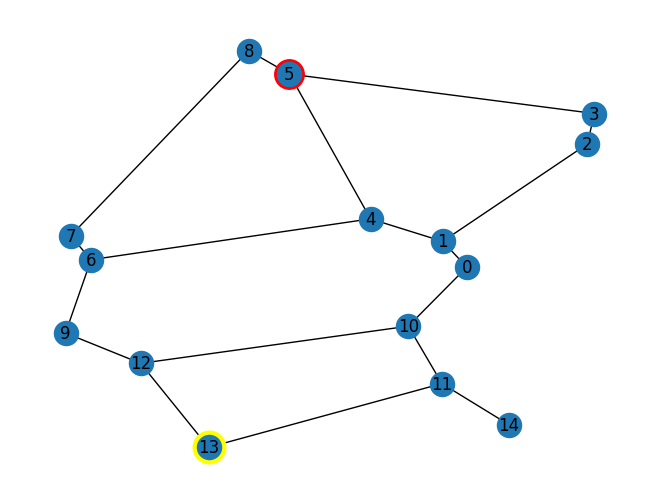

In [54]:
env.reset()
env.temp_render(1)

In [58]:
state = env.reset()
no_of_agents = len(list(env.possible_agents))
QValues = [[0]*16]*(env.g_no_node**2)
SValues = [0]*env.g_no_node**2
# delta = 14500
# diff = 100000
count = 100
# while (diff > delta):
for i in range(count):
    state = env.reset()
    temp_value_func = [v for v in SValues]
    temp_diff = 0;
    QValues = ss_q_val(env,QValues)
    SValues = [max(i) for i in QValues]
    for index in range(len(QValues)):
        temp_diff += abs(temp_value_func[index]-SValues[index])
    diff = temp_diff
    print(max(SValues))
    # plt.plot(range(env.g_no_node**2),SValues,alpha = 0.8)
    # plt.plot(range(env.g_no_node**2),temp_value_func,color = 'r',alpha = 0.2)
    # plt.plot(range(env.g_no_node**2),s_values)
    # name = 'images/training/{i}.png'
    # plt.savefig(name)
    # plt.show()
    # print(temp_diff)
    

-1.0
-1.75
-2.3125
-2.734375
-3.05078125
-3.2880859375
-3.466064453125
-3.59954833984375
-3.6996612548828125
-3.7747459411621094
-3.831059455871582
-3.8732945919036865
-3.904970943927765
-3.9287282079458237
-3.9465461559593678
-3.959909616969526
-3.9699322127271444
-3.9774491595453583
-3.9830868696590187
-3.987315152244264
-3.990486364183198
-3.9928647731373985
-3.994648579853049
-3.9959864348897867
-3.99698982616734
-3.997742369625505
-3.9983067772191285
-3.9987300829143466
-3.99904756218576
-3.99928567163932
-3.9994642537294904
-3.999598190297118
-3.999698642722838
-3.9997739820421288
-3.9998304865315966
-3.9998728648986974
-3.999904648674023
-3.9999284865055174
-3.999946364879138
-3.9999597736593535
-3.999969830244515
-3.9999773726833863
-3.9999830295125394
-3.9999872721344047
-3.9999904541008036
-3.9999928405756027
-3.999994630431702
-3.9999959728237764
-3.9999969796178325
-3.999997734713374
-3.9999983010350304
-3.9999987257762726
-3.9999990443322044
-3.9999992832491533
-3.99999946